In [1]:
from scraper import *
#import pandas as pd
#OPname, OPtxt, CommentText, commentName, URL, TOPIC, deltalink, deltabot= search("people")




In [2]:
my_manual_data = makeDF(range(0,100,1))


0) found a delta in: https://old.reddit.com/r/changemyview/comments/9rb54h/cmv_the_concept_of_gender_does_not_serve_a_useful/
1) found a delta in: https://old.reddit.com/r/changemyview/comments/9rckpx/cmv_one_should_feel_more_compelled_to_criticize/
2) found a delta in: https://old.reddit.com/r/changemyview/comments/9rdst9/cmv_apple_uses_planned_obsolescence_to_force/
3) no delta found in: CMV: Apple uses planned obsolescence to force users to get a new iPhone.
4) found a delta in: https://old.reddit.com/r/changemyview/comments/9rd0b2/cmv_transgender_rights_is_a_low_priority_issue/
5) no delta found in: CMV: Transgender rights is a low priority issue and the left should divert its political capital elsewhere for now
6) no delta found in: CMV: Multi-million dollar companies do not take political stances for reasons other than profit
7) no delta found in: CMV: Monetization ruined YouTube
8) found a delta in: https://old.reddit.com/r/changemyview/comments/9r3lls/cmv_when_someone_gets_upse

71) found a delta in: https://old.reddit.com/r/changemyview/comments/9qrata/cmv_harvard_getting_sued_over_discriminatory/
72) found a delta in: https://old.reddit.com/r/changemyview/comments/9r8wfg/cmv_most_atheists_are_stubborn_and_wont_accept/
73) found a delta in: https://old.reddit.com/r/changemyview/comments/9r0dol/cmv_hocus_pocus_is_a_terrible_movie_and_not_kid/
74) found a delta in: https://old.reddit.com/r/changemyview/comments/9r0dol/cmv_hocus_pocus_is_a_terrible_movie_and_not_kid/
75) found a delta in: https://old.reddit.com/r/changemyview/comments/9r1h1x/cmvi_feel_my_governments_advertising_campaign_for/
76) no delta found in: CMV: There is nothing wrong with the n-word (nationalist)
77) found a delta in: https://old.reddit.com/r/changemyview/comments/9r17nc/cmv_incels_are_not_a_cult_and_presenting_them_as/
78) found a delta in: https://old.reddit.com/r/changemyview/comments/9r42fc/cmv_women_should_not_be_paid_as_much_as_men_in/
79) no delta found in: CMV: reddit should tell

In [37]:
my_manual_data2 = makeDF(range(100,300,1))

100) found a delta in: https://old.reddit.com/r/changemyview/comments/9qvb72/cmv_i_dont_see_anything_racist_with_using_black/
101) found a delta in: https://old.reddit.com/r/changemyview/comments/9qoybr/cmv_climate_change_is_going_to_end_modern/
102) no delta found in: CMV: Video game remasters are a good thing, as long as it's a good remaster.
103) no delta found in: CMV: Dedicated turn lanes should not have yield signs.
104) found a delta in: https://old.reddit.com/r/changemyview/comments/9qp2ej/cmv_starship_troopers_does_not_promote_fascism/
105) no delta found in: CMV: You can't love family that much if you aren't willing to help out with mundane life
106) found a delta in: https://old.reddit.com/r/changemyview/comments/9qp339/cmv_the_idea_of_a_god_only_exists_because_people/
107) found a delta in: https://old.reddit.com/r/changemyview/comments/9qplbs/cmv_making_election_day_in_the_united_states_a/
108) found a delta in: https://old.reddit.com/r/changemyview/comments/9qpj9g/cmv_we_

168) found a delta in: https://old.reddit.com/r/changemyview/comments/9q6kof/cmv_those_that_spread_misinformation_about_the/
169) no delta found in: CMV: Victimless Crimes Shouldn't Be Illegal
170) no delta found in: CMV: Mega threads are not a good place for any type of discussion
171) found a delta in: https://old.reddit.com/r/changemyview/comments/9qgn4d/cmv_humans_are_the_worst_monsters/
172) no delta found in: CMV: The dominant worldview that the universe and human life is meaningless is a harm to culture and thereby to society.
173) no delta found in: CMV: Income Disparity In America Is A Big Problem And Needs To Be Fixed
174) no delta found in: CMV: Income Disparity In America Is A Big Problem And Needs To Be Fixed
175) found a delta in: https://old.reddit.com/r/changemyview/comments/9qdbzf/cmv_world_war_3_will_happen_within_50_years/
176) no delta found in: CMV: The US standardization of automatic transmissions over manuals as a superior method is like the way the rest of the w

235) no delta found in: CMV: You can prove things in science
236) found a delta in: https://old.reddit.com/r/changemyview/comments/9plwrs/cmv_an_ai_doomsday_scenario_will_not_happen/
237) no delta found in: CMV: No Mans Sky was never a bad game, and the community rushed it out.
238) found a delta in: https://old.reddit.com/r/changemyview/comments/9pkrtf/cmv_hair_should_not_be_gendered/
239) found a delta in: https://old.reddit.com/r/changemyview/comments/9pisur/cmv_zipup_onesies_should_have_the_zipper_rest_at/
240) no delta found in: CMV: Nothing I can do as a cyclist will ever make drivers stop hating me.
241) found a delta in: https://old.reddit.com/r/changemyview/comments/9pr1q6/cmv_the_state_should_start_regulating_procreation/
242) no delta found in: CMV: Any benefits I've received from being a white male are primarily from non-white women and men. It seems like white privilege and the benefits of the patriarchy come from everyone except white men. I feel specially qualified to sa

In [40]:
import numpy as np

def acc_ease(my_manual_data):
    acc2 = []
    for i in range(len(my_manual_data)):
        OPease = flesch_ease_OP(my_manual_data[i][1])
        COMease = flesch_ease_comm(my_manual_data[i][2])
        Dease = flesch_ease_comm(my_manual_data[i][3])
        similar, loc = similarEase(OPease, COMease, "", "unknown")
        for x in range(len(similar)):
            similar[x] = abs(similar[x] - OPease)
        similar.sort()
        for x in range(len(Dease)):
            Dease[x] = abs(Dease[x]-OPease)
        for x in range(len(COMease)):
            COMease[x] = abs(COMease[x]-OPease)


        COMease.sort()
        save_best = len(COMease)
        for x in range(len(Dease)):
            for i in range(len(COMease)):
                if Dease[x]< COMease[i]:
                    if i <= save_best:
                        save_best = i
                    else:
                        break
        acc2.append(100-(save_best/len(COMease))*100)


    print(np.mean(acc2))
    return(acc2)
acc2 = acc_ease(my_manual_data)
acc3 = acc_ease(my_manual_data2)

for i in range(len(acc3)):
    acc2.append(acc3[i])

58.37465466812467
71.11246251473577


124


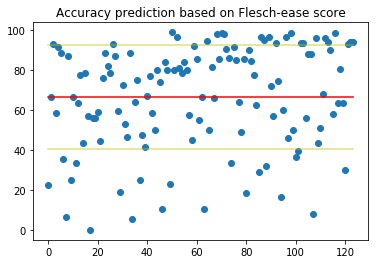

66.59259521432537 25.909051708329827


In [41]:
import numpy as np
import matplotlib.pyplot as plt
y = []
x = acc2
avg = np.mean(acc2)
avgarr = []
stdev = np.std(acc2)
stdevarrup = []
stdevarrdown =[]
print(len(acc2))
for i in range(len(acc2)):
    y.append(i)
    avgarr.append(avg)
    stdevarrup.append(avg+stdev)
    stdevarrdown.append(avg-stdev)
plt.scatter(y, x)
plt.plot(y,avgarr, color='r')
plt.plot(y,stdevarrdown, color='y', alpha=0.5)
plt.plot(y,stdevarrup, color='y', alpha=0.5)
plt.title("Accuracy prediction based on Flesch-ease score")
plt.show()

print(avg,stdev)

In [ ]:
OPname, OPtxt, CommentText, commentName, URL, TOPIC, deltalink, deltabot= urlSearch(186)
print(TOPIC)
print(URL)

In [ ]:
#OPtext, CommentText, TOPIC, deltaText
def makeDF(post_range, filename):
    my_data_log = []
    for num in post_range:
        if num != 20:
            OPname, OPtxt, CommentText, commentName, URL, TOPIC, deltalink, deltabot= urlSearch(num)
            if deltalink != None and len(deltalink) >0:
                print(str(num) + ") found a delta in: "+ URL)
                deltaNames, deltapost, delta_urls = getDeltaNames(deltalink, deltabot, CommentText)
                #print(deltaComments)
                #deltapost = find_delta_txt(deltaNames, deltaComments, CommentText, commentName)
                easyOP = flesch_ease_OP(OPtxt)
                
                easyComm = []
                for x in range(len(deltapost)):
                    easyComm.append(flesch_ease_comm(CommentText))
                my_data_log.append([OPname, OPtxt, commentName,CommentText,  URL, TOPIC, deltalink, deltaNames, deltapost, easyOP, easyComm])
            else:
                  print(str(num) + ") no delta found in: "+ TOPIC)
    filename= 'cmv_'+str(filename)+'.csv'
    pd.DataFrame(my_data_log, columns=['op_name','op_text','comment_name', 'comment_text', 'url', 'topic', 'delta_link', 'delta_names', 'delta_text', 'op_easy_score', 'delta_easy_score']).to_csv(filename)
    return(my_data_log)